# Statistical Significance of Information Value

While Information Value and Weight of Evidence may be a totally new concepts for many people (especially collegues from other departments, not statisticians), statistical significance is much more familiar term. During presentation of analysis you might be asked if the obtained results are statistically significant. IV & WOE technique doesn't give explicit answer to this question (although it gives some intuition which results are relevant).

This analysis shows how differences in distribution of 'goods' and 'bads' are measured by two methods: IV & WOE and p-value & effect size.

- In order to see how it can be used in practice, check [**Telco Customer Churn Analysis**](https://github.com/klaudia-nazarko/woe-and-iv/blob/master/telco_customer_churn_analysis.ipynb).
- Get to know how to use Information Value module, check [**IV and WOE in Python**](https://github.com/klaudia-nazarko/woe-and-iv/blob/master/iv_and_woe_in_python.ipynb)

## P-value and effect size

In order to measure p-value and effect size in this analysis it was used:
* chi-square test of independence of variables
* cramers' v effect size

>Pearson's chi-squared test (χ2) is a statistical test applied to sets of categorical data to evaluate how likely it is that any observed difference between the sets arose by chance. A test of independence assesses whether observations consisting of measures on two variables, expressed in a contingency table, are independent of each other (e.g. polling responses from people of different nationalities to see if one's nationality is related to the response).

Chi-square says that there is a significant relationship between variables, but it does not say just how strong and important this is.

>Cramér's V is a measure of association between two nominal variables. Cramer's V is a post-test to give this additional information. It varies between 0 and 1: close to 0 it shows little association between variables; close to 1, it indicates a strong association.

In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype

from Features import *
from AttributeRelevance import *

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)  

In [3]:
df = pd.read_csv('data/telco_churn.csv', na_values=[' '])

In [4]:
df.columns = [c[0].lower() + c[1:] for c in df.columns]
df['label'] = df['churn'].map({'Yes': 0, 'No': 1})
df['seniorCitizen'] = df['seniorCitizen'].map({1: 'Yes', 0: 'No'})
df.drop(['customerID', 'churn'], axis=1, inplace=True)

In [5]:
df.sample(5)

,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,label
4831,Female,No,No,No,18,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,40.20,711.95,1
3739,Male,No,No,No,24,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.60,592.65,1
4590,Female,Yes,No,No,57,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),101.30,"5,779.60",1
179,Male,No,Yes,No,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.55,"1,252.00",1
882,Female,No,No,No,6,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,83.90,497.55,0


In [6]:
feats_dict = {}

for col in [c for c in df.columns if c != 'label']:
    if is_numeric_dtype(df[col]):
        feats_dict[col] = ContinuousFeature(df, col)
    else:
        feats_dict[col] = CategoricalFeature(df, col)

feats = list(feats_dict.values())

In [7]:
iv = IV()
s = StatsSignificance()

ar = AttributeRelevance()

## Information value vs statistical significance

Analysis of features with both IV & WOE and Chi-square test & Cramers'V shows some interesting relations between results of those two methods.

**P-value vs information value**

P-value for almost all featues is very, very small (less than 0.01 which gives us 99% confidence level). Only the differences of distribution for two features (with IV = 0) aren't statistically significant. It leads to the conclusion that for features that were recognized as at least medium predictor (the most interesting from analysis perspective) the differences in distribution of 'goods' and 'bads' is statistically significant. However, it's good to note that low p-value doesn't give information about the strength of relationship.

**Information value vs Cramers' V**

There is strong, almost linear, relationship between information value and effect size. Features with high information value have high effect size as well. Correlation coefficient for these values is: 0.94 (Pearson) and 0.98 (Spearman).

**Interpretation of information value and effect size**

Although the interpretation of information value and effect size differs a bit, the rules are very similar: values closer to 0 imply very weak (or lack of) relationship, while higher values suggest stronger relation.

In [32]:
df_analysis = ar.analyze(feats, iv, s, interpretation=True)
display(df_analysis)

,iv,p-value,effect_size,iv_interpretation,es_interpretation
contract,1.24,0.00,0.41,suspicious,strong
tenure,0.78,0.00,0.37,suspicious,medium
onlineSecurity,0.72,0.00,0.35,suspicious,medium
techSupport,0.70,0.00,0.34,suspicious,medium
internetService,0.62,0.00,0.32,suspicious,medium
onlineBackup,0.53,0.00,0.29,suspicious,medium
deviceProtection,0.50,0.00,0.28,strong,medium
paymentMethod,0.46,0.00,0.30,strong,medium
streamingMovies,0.38,0.00,0.23,strong,medium
streamingTV,0.38,0.00,0.23,strong,medium


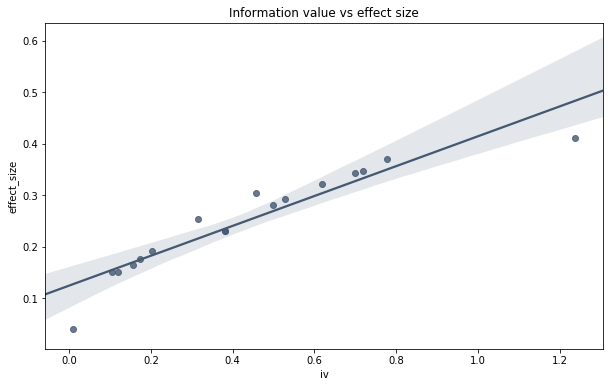

Pearson correlation: 0.94
Spearman correlation: 0.98


In [20]:
df_analysis_sign = df_analysis[df_analysis['p-value']<0.05]

fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x='iv', y='effect_size', data=df_analysis_sign, color='#455872')
ax.set_title('Information value vs effect size')
plt.show()

print('Pearson correlation: %0.2f' % df_analysis_sign['iv'].corr(df_analysis_sign['effect_size']))
print('Spearman correlation: %0.2f' % df_analysis_sign['iv'].corr(df_analysis_sign['effect_size'], method='spearman'))

## Weight of Evidence vs share of 'goods' in total

WOE is one of ways to show the proportion of 'good' observations in a group (bin). Another way of doing it is to calculate a share of 'goods' in total. It's not a surprise that results obtained in two ways are very similar. The relation remains the same, it's just presented on a different scale.

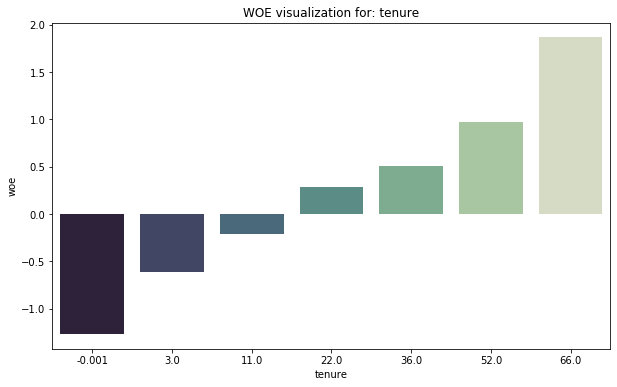

In [23]:
iv.draw_woe(feats_dict['tenure'])

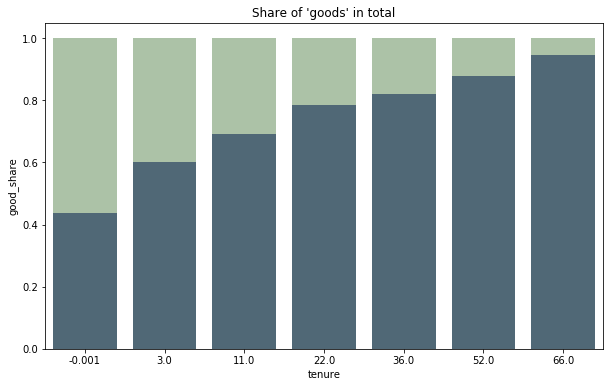

In [30]:
df_tenure = iv.group_by_feature(feats_dict['tenure'])
df_tenure['total'] = 1
df_tenure['good_share'] = df_tenure['good'] / df_tenure['count']

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='tenure', y='total', data=df_tenure, color='#a9c6a3')
sns.barplot(x='tenure', y='good_share', data=df_tenure, color='#4a6a7c')
ax.set_title("Share of 'goods' in total")
plt.show()

### Reference

1. https://en.wikipedia.org/wiki/Chi-squared_test
2. https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V